In [38]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler,power_transform
from sklearn. preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset from GitHub to jupyter notebook

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [4]:
#loading into dataframe

In [5]:
df=pd.DataFrame(data=df)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#checking null values via heatmap and isnull

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

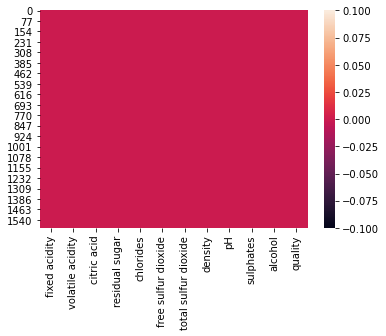

In [9]:
sn.heatmap(df.isnull()) 

In [ ]:
#describe function to check on skewness(diff btw meana nd std) and outliers(diff between max and mean)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

Text(0.5, 0, 'quality')

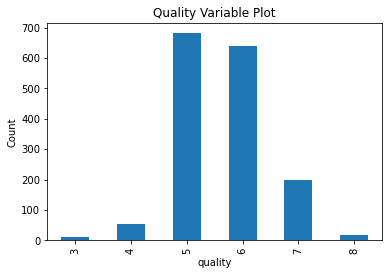

In [13]:
plt.figure()
plt.title('Quality Variable Plot')
pd.Series(df['quality']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("quality")

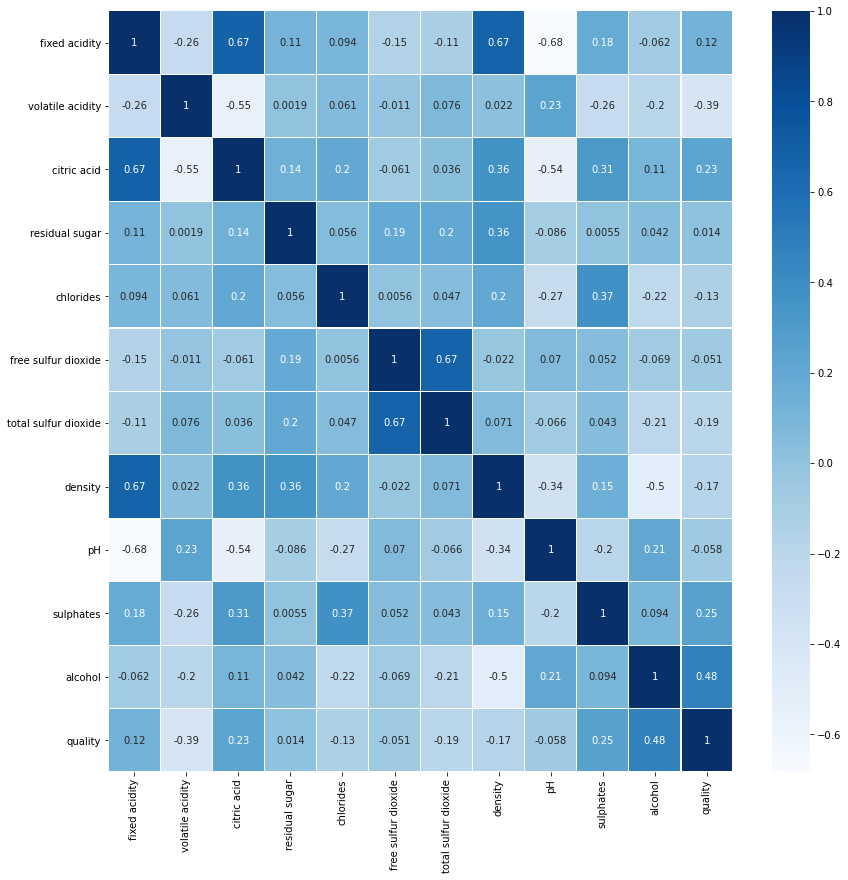

In [14]:
plt.figure(figsize=(14,14))
sn.heatmap(df.corr(),linewidths=.1,cmap="Blues", annot=True)

In [15]:
corr_matrix=df.corr()
corr_matrix["quality"].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [16]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [17]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [18]:
X_features = X
X = StandardScaler().fit_transform(X)


In [19]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
goodquality             2.129363
dtype: float64

In [20]:
X=pd.DataFrame(power_transform(X,method="yeo-johnson"))
X
X.skew()

0    -0.015878
1     0.053351
2     0.067362
3    -0.014239
4    -0.448728
5     0.130864
6     0.152539
7    -0.009471
8     0.013566
9    -0.012242
10    0.117455
dtype: float64

In [21]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,-0.443413,0.986882,-1.502162,-0.630245,-0.126655,-0.332051,-0.185384,0.565035,1.272011,-0.578801,-1.086355
1,-0.144415,1.768456,-1.502162,0.612182,0.785227,1.026115,0.898913,0.039022,-0.711262,0.426514,-0.501686
2,-0.144415,1.258756,-1.247779,0.185945,0.589700,0.183230,0.569238,0.144795,-0.309272,0.220677,-0.501686
3,1.494884,-1.547955,1.409491,-0.630245,-0.182441,0.394383,0.732094,0.669491,-0.983232,-0.377918,-0.501686
4,-0.443413,0.986882,-1.502162,-0.630245,-0.126655,-0.332051,-0.185384,0.565035,1.272011,-0.578801,-1.086355
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.495902,0.498923,-0.999232,-0.397363,0.517099,1.427404,0.239664,-0.980011,0.903783,-0.377918,0.312518
1595,-1.792490,0.232703,-0.877285,0.009989,-1.035353,1.752331,0.479149,-0.860965,1.332899,0.866729,0.881173
1596,-1.399884,0.004761,-0.697451,0.185945,-0.126655,1.267070,0.081446,-0.526780,0.717579,0.818183,0.735837
1597,-1.792490,0.724762,-0.756973,-0.397363,-0.182441,1.427404,0.239664,-0.672061,1.635505,0.606983,-0.001858


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [56]:
def eval(X):
    mod=X
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    print("accuracy score is ",accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [62]:
eval(DecisionTreeClassifier(random_state=1))


accuracy score is  0.895
[[326  29]
 [ 13  32]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.52      0.71      0.60        45

    accuracy                           0.90       400
   macro avg       0.74      0.81      0.77       400
weighted avg       0.91      0.90      0.90       400



In [58]:
scr=cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
print("Cross validation score of DecisionTreeClassifier model is :",scr.mean())

Cross validation score of DecisionTreeClassifier model is : 0.7923687304075235


In [60]:
feature_importances = pd.Series(model.feature_importances_, index=X_features.columns)
feature_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

NameError: name 'model' is not defined

In [26]:
eval(RandomForestClassifier(random_state=1))


accuracy score is  0.92
[[343  12]
 [ 20  25]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       355
           1       0.68      0.56      0.61        45

    accuracy                           0.92       400
   macro avg       0.81      0.76      0.78       400
weighted avg       0.91      0.92      0.92       400



In [27]:
scr=cross_val_score(RandomForestClassifier(),X,y,cv=5)
print("Cross validation score of RandomForestClassifier model is :",scr.mean())

Cross validation score of RandomForestClassifier model is : 0.8667985893416927


In [28]:
eval(SVC(random_state=1))

accuracy score is  0.9125
[[350   5]
 [ 30  15]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       355
           1       0.75      0.33      0.46        45

    accuracy                           0.91       400
   macro avg       0.84      0.66      0.71       400
weighted avg       0.90      0.91      0.90       400



In [29]:
scr=cross_val_score(SVC(),X,y,cv=5)
print("Cross validation score of SVC model is :",scr.mean())

Cross validation score of SVC model is : 0.8624157523510971


In [30]:
eval(AdaBoostClassifier(random_state=1))

accuracy score is  0.89
[[334  21]
 [ 23  22]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [31]:
scr=cross_val_score(AdaBoostClassifier(),X,y,cv=5)
print("Cross validation score of Ada Boost Classifier model is :",scr.mean())

Cross validation score of Ada Boost Classifier model is : 0.8561637931034483


In [32]:
eval(GradientBoostingClassifier(random_state=1))

accuracy score is  0.8925
[[334  21]
 [ 22  23]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400



In [33]:
scr=cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print("Cross validation score of GradientBoostingClassifier model is :",scr.mean())

Cross validation score of GradientBoostingClassifier model is : 0.8667966300940438


In [34]:
eval(LogisticRegression())

accuracy score is  0.9
[[339  16]
 [ 24  21]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       355
           1       0.57      0.47      0.51        45

    accuracy                           0.90       400
   macro avg       0.75      0.71      0.73       400
weighted avg       0.89      0.90      0.90       400



In [35]:
scr=cross_val_score(LogisticRegression(),X,y,cv=5)
print("Cross validation score of Logistic Regression model is :",scr.mean())

Cross validation score of Logistic Regression model is : 0.8711794670846394


In [36]:
#dtc =0.107
#rfc =0.05
#svc=0.041
#ada=0.032
#grad=0.0233
#lr=0.033


In [37]:
#gradient boost is the most accurate

In [43]:
parameter ={'n_estimators':np.arange(2,10),'loss':['deviance', 'exponential']}

In [44]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)
GCV.fit(X_train,y_train)
GCV.best_params_ 

{'loss': 'deviance', 'n_estimators': 9}

In [45]:
GCV.best_params_ 

{'loss': 'deviance', 'n_estimators': 9}

In [54]:
Final_mod=GradientBoostingClassifier(loss= 'deviance',n_estimators =9)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
accu=accuracy_score(y_test,pred)
print(accu*100)
Final_mod


90.5


GradientBoostingClassifier(n_estimators=9)

In [63]:
import joblib
joblib.dump(Final_mod,"WineQuality.pkl")

['WineQuality.pkl']